In [1]:
import numpy as np

In [2]:
def load_coffee_data():
    """
    Creates a coffee roasting dataset.
    roasting duration: 12-15 minutes is best
    temperature range: 175-260C is best
    """

    rng = np.random.default_rng(2)  # random number generator with seed 2

    X = rng.random(400).reshape(-1, 2)  # generates numbers b/w 0 and 1. shaped as 200 rows and 2 columns
    X[:, 1] = X[:, 1] * 4 + 11.5  # creates values for the duration column
    X[:, 0] = X[:, 0] * (285-150) + 150  # temperature column
    Y = np.zeros(len(X))  # Y array of length 200 initialized to 0

    i = 0
    for t, d in X:
        y = -3/(260-175)*t + 21  # for each temperature 't' it calculates a threshold duration 'y'
        if (t > 175 and t < 260 and d > 12 and d < 15 and d <= y):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1, 1))

In [3]:
X, Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


In [5]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:, 0]):0.2f}, {np.min(X[:, 0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:, 1]):0.2f}, {np.min(X[:, 1]):0.2f}")

# Manual normalization
mean = np.mean(X, axis=0, keepdims=True)
std = np.std(X, axis=0, keepdims=True)
Xn = (X - mean) / std

print(f"Temperature Max, Min post normalization: {np.max(Xn[:, 0]):0.2f}, {np.min(Xn[:, 0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:, 1]):0.2f}, {np.min(Xn[:, 1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


## Forward Propagation in Numpy
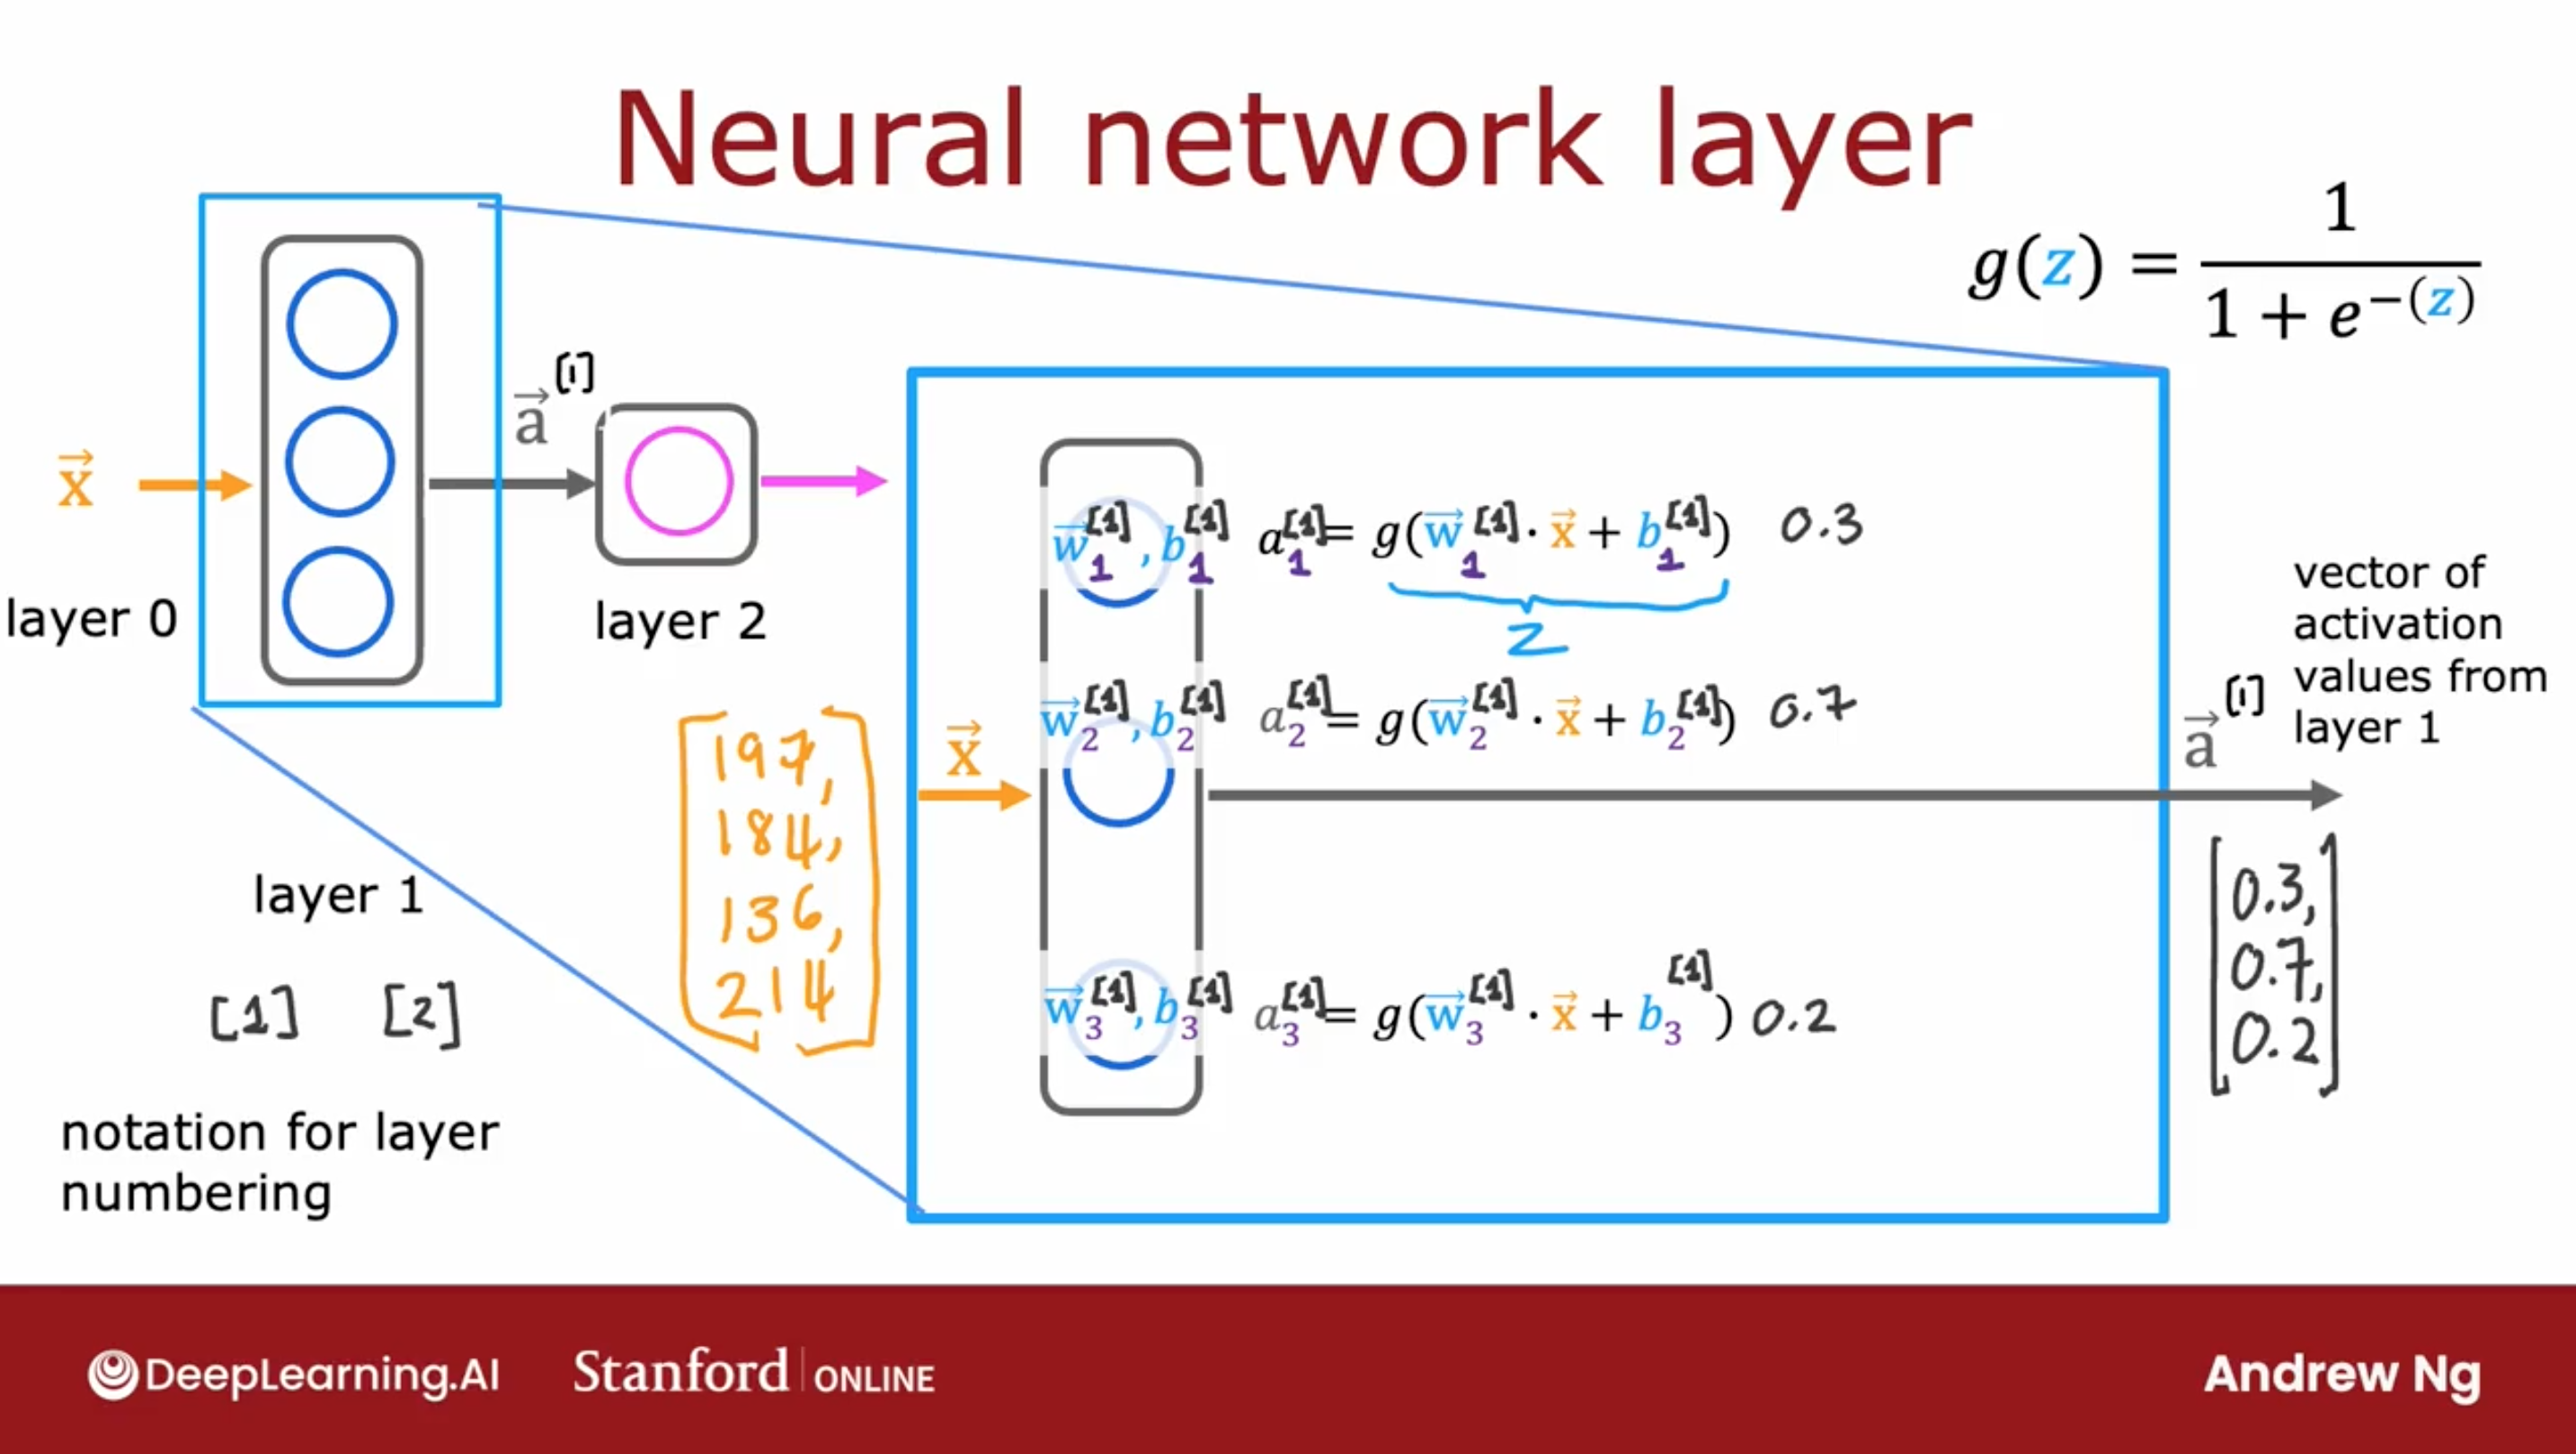

In [6]:
def sigmoid_np(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def dense(a_in, W, b):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
    Returns
      a_out (ndarray (j,))  : j units|
    """

    units = W.shape[1]  # to get number of columns i.e. neurons in that layer
    a_out = np.zeros(units)  # initializing the output vector
    for j in range(units):
        w = W[:, j]  # for selecting the jth column/neuron's weights
        z = np.dot(w, a_in) + b[j]
        a_out[j] = sigmoid_np(z)
    return (a_out)


In [8]:
# to build a 2-layered neural network
def sequential(x, W1, b1, W2, b2):
    a1 = dense(x, W1, b1)
    a2 = dense(a1, W2, b2)
    return a2

In [9]:
# we can use pre-calculated weights
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [10]:
# this will take in a matrix X and make a prediction by running the model
def predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m, 1))
    for i in range(m):
        p[i, 0] = sequential(X[i], W1, b1, W2, b2)
    return(p)

In [11]:
# let's test this
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example

# normalizing the inputs
Xn_test = (X_test - mean) / std
predictions = predict(Xn_test, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [14]:
decisions = (predictions >= 0.5).astype(int)
print(f"decisions:\n{decisions}")

decisions:
[[1]
 [0]]
